In [14]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborninstance
from sklearn.model_selection import train_test_split
from sklearn import metrics

dataset = pd.read_csv("/content/drive/My Drive/Wine+Quality+Dataset.csv")

dataset.shape

(1599, 12)

In [15]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [16]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


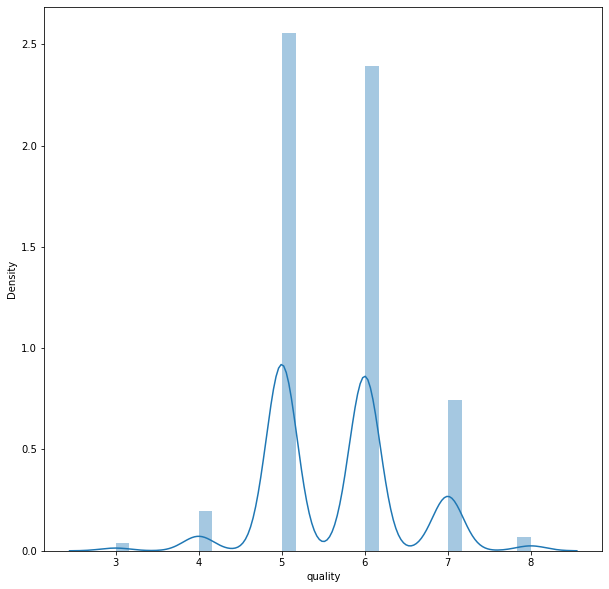

In [17]:
plt.figure(figsize=(10,10))
plt.tight_layout()
seaborninstance.distplot(dataset['quality'])
plt.show()

In [18]:
X = np.asarray(dataset.iloc[:,:-1])
Y = dataset['quality'].values.reshape(-1,1)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [21]:
forest = RandomForestClassifier(n_estimators=100,random_state = 0)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
Y_pred = forest.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,6,5
1,5,5
2,7,7
3,6,5
4,5,5
...,...,...
315,6,6
316,4,6
317,5,7
318,4,5


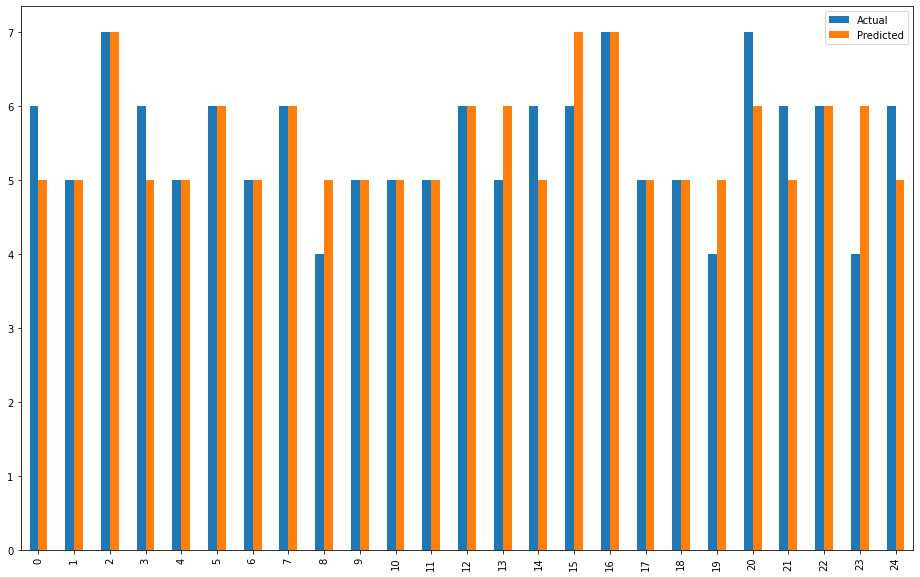

In [24]:
df1 = df.head(25)
df1.plot(kind = 'bar', figsize=(16,10))
plt.show()

In [25]:
print('Mean Absolute Error => ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error => ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error => ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error =>  0.321875
Mean Squared Error =>  0.403125
Root Mean Squared Error =>  0.6349212549600147


In [26]:
print(metrics.classification_report(Y_test, Y_pred.round(), digits=3))

              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        11
           5      0.733     0.815     0.772       135
           6      0.737     0.711     0.724       142
           7      0.548     0.630     0.586        27
           8      0.000     0.000     0.000         3

    accuracy                          0.713       320
   macro avg      0.336     0.359     0.347       320
weighted avg      0.683     0.713     0.696       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
